# Creating time series data frame
Time series data is used when we want to analyze or explore variation over time. This is useful when exploring Twitter text data if we want to track the prevalence of a word or set of words.

The first step in doing this is converting the DataFrame into a format which can be handled using pandas time series methods. That can be done by converting the index to a datetime type.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Import Data
ds_tweets = pd.read_csv(r"C:\Users\Ricardo S. Biason\OneDrive\Ric\DataCamp\Marketing Analytics for Python\Analyzing Social Media Data in Python\Data Science Hashtag dataset.csv")

In [36]:
ds_tweets.head(n=5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,...,retweeted_status,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name
0,NaN,NaN,Thu Mar 01 07:02:41 +0000 2018,NaN,"{'hashtags': [{'text': 'python', 'indices': [8...",NaN,NaN,NaN,0,False,...,{'created_at': 'Thu Mar 01 06:47:35 +0000 2018...,NaN,Learning Penetration Testing With Python http...,pythonbot_,"<a href=""https://todo.mushfiqweb.com"" rel=""nof...",RT @pythonbot_: Learning Penetration Testing W...,1519887761662,False,"{'id': 67016746, 'id_str': '67016746', 'name':...",mushfiqweb
1,NaN,NaN,Thu Mar 01 07:57:08 +0000 2018,NaN,"{'hashtags': [{'text': 'Software', 'indices': ...",NaN,NaN,NaN,0,False,...,{'created_at': 'Thu Mar 01 07:54:04 +0000 2018...,NaN,Is Language Agnosticism the Future of #Softwar...,I_m_ranjeet,"<a href=""https://www.botlibre.com"" rel=""nofoll...",RT @I_m_ranjeet: Is Language Agnosticism the F...,1519891028660,False,"{'id': 962595301109518336, 'id_str': '96259530...",Dw_Develops
2,NaN,NaN,Thu Mar 01 08:09:02 +0000 2018,NaN,"{'hashtags': [{'text': 'python', 'indices': [0...",NaN,"{'full_text': ""#python goes to #school for #be...",#python goes to #school for #beginner #scienti...,0,False,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#python goes to #school for #beginner #scienti...,1519891742657,True,"{'id': 946400503029678080, 'id_str': '94640050...",pinyosminyos
3,NaN,NaN,Thu Mar 01 09:22:21 +0000 2018,"[0, 115]","{'hashtags': [{'text': 'data', 'indices': [66,...","{'media': [{'id': 969140774720847873, 'id_str'...",NaN,NaN,0,False,...,NaN,NaN,NaN,NaN,"<a href=""https://www.nytimes.com/"" rel=""nofoll...",Easy way to set Oracle Active Dataguard\n☞ htt...,1519896141665,False,"{'id': 915436926500462592, 'id_str': '91543692...",datascience_new
4,NaN,NaN,Thu Mar 01 12:04:04 +0000 2018,"[0, 100]","{'hashtags': [{'text': 'python', 'indices': [4...","{'media': [{'id': 969181471796731904, 'id_str'...",NaN,NaN,0,False,...,NaN,NaN,NaN,NaN,"<a href=""https://www.nytimes.com/"" rel=""nofoll...",Python 3 for Beginners\n☞ https://t.co/va5XaJX...,1519905844657,False,"{'id': 912955536823410689, 'id_str': '91295553...",PythonCs


In [37]:
# Print created_at to see the original format of datetime in Twitter data
print(ds_tweets['created_at'].head())

# Convert the created_at column to np.datetime object
ds_tweets['created_at'] = pd.to_datetime(ds_tweets['created_at'])

# Print created_at to see new format
print(ds_tweets['created_at'].head())

# Set the index of ds_tweets to created_at
ds_tweets = ds_tweets.set_index('created_at')

0    Thu Mar 01 07:02:41 +0000 2018
1    Thu Mar 01 07:57:08 +0000 2018
2    Thu Mar 01 08:09:02 +0000 2018
3    Thu Mar 01 09:22:21 +0000 2018
4    Thu Mar 01 12:04:04 +0000 2018
Name: created_at, dtype: object
0   2018-03-01 07:02:41+00:00
1   2018-03-01 07:57:08+00:00
2   2018-03-01 08:09:02+00:00
3   2018-03-01 09:22:21+00:00
4   2018-03-01 12:04:04+00:00
Name: created_at, dtype: datetime64[ns, UTC]


Looking for text in all the wrong places
Recall that relevant text may not only be in the main text field of the tweet. It may also be in the extended_tweet, the retweeted_status, or the quoted_status. We need to check all of these fields to make sure we've accounted for all the of the relevant text. We'll do this often so we're going to create a function which does this.

The first two lines check if the main text field or the extended_tweet contain the text. We will need to check the rest.

In [42]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['quoted_status-text'].str.contains(word, case = False) 
    contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['retweeted_status-text'].str.contains(word, case = False) 
    contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False)
    return contains_column

# Generating mean frequency

We need to produce a metric which can be graphed over time. Our function check_word_in_tweet() returns a boolean Series. Remember that the boolean value True == 1, so we can produce a column for each keyword we're interested in and use it to understand its over time prevalence.

In [43]:
# Create a python column
ds_tweets['python'] = check_word_in_tweet('#python', ds_tweets)

# Create an rstats column
ds_tweets['rstats'] = check_word_in_tweet('#rstats', ds_tweets)

Lastly, we'll create a per-day average of the mentions of both hashtags and plot them across time. We'll first create proportions from the two boolean Series by the day, then we'll plot them.

matplotlib.pyplot had been imported as plt and ds_tweets.

We'll plot those keyword means over time. We import `matplotlib.pyplot`, then we use `plt.plot` to create the plot. On the x-axis, we'll use the minute index and on the y-axis, we'll use the generated mean. We'll color Facebook blue and Google green. 

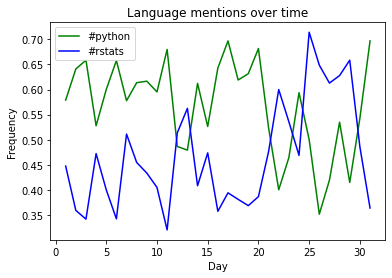

In [41]:
# Average of python column by day
mean_python = ds_tweets['python'].resample('1 d').mean()

# Average of rstats column by day
mean_rstats = ds_tweets['rstats'].resample('1 d').mean()

# Plot mean python/rstats by day
plt.plot(mean_python.index.day, mean_python, color = 'green')
plt.plot(mean_rstats.index.day, mean_rstats, color = 'blue')

# Add labels and show
plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('Language mentions over time')
plt.legend(('#python', '#rstats'))
plt.show()

In this dataset, we see that mentions of Facebook seem generally higher over time compared to mentions of Google.